### Fourier transform in one dimensions discrete interpretation
**Steps**:
* Generate 1000 discrete number which is distributed as $y=7*\sin(2\pi*200x)+5*\sin(2\pi*300x)+3*\sin(2\pi*400x)$
* According to the forlumation below to get the frequency/spectrum domain
$$
f(x)=\int_{-\infty}^{\infty}F(k)e^{2\pi ikx}dk\\$$
$$
F(x)=\int_{-\infty}^{\infty}f(k)e^{-2\pi ikx}dk
$$
* Forlumation above is applied in continuously data. Here, $f(x)$ means the 1000 numbers, and the $F(x)$ means the frequency domain corresponding.
* We can change for discrete one easily like below.
$$
f(x)=\sum_{k=0}^{N-1}F(k)e^{2\pi ikx}\\$$
$$
F(x)=\sum_{k=0}^{N-1}f(k)e^{-2\pi ikx}\\
$$
* Which has the similar implication.
* Refer to https://blog.csdn.net/qq_27825451/article/details/88553441

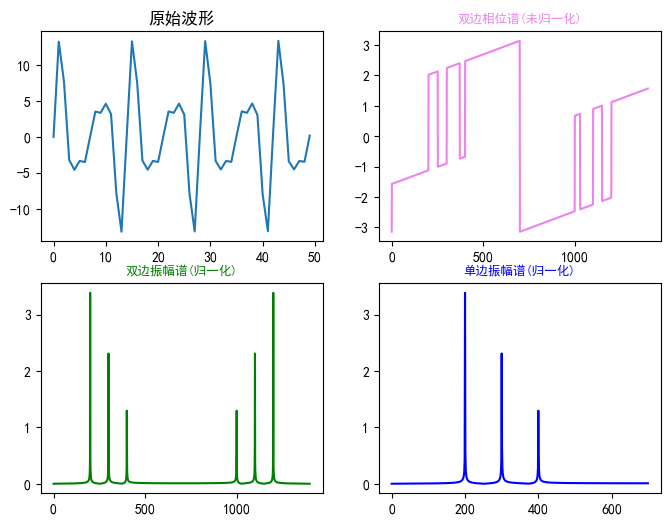

In [2]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号
 
# 根据香农原则，知采样频率要大于最大信号频率2倍，所以这里设置采样频率为1000赫兹
# 一般来说采用频率越高，最后傅里叶变化的准确度越高
# 你可以试试，如果采样频率过小，假如取值500，效果就比较差---连频率峰值都对不上
N=1400
x=np.linspace(0,1,N)
 
# 设置需要采样的信号，频率分量有200，300和400
y=7*np.sin(2*np.pi*200*x) + 5*np.sin(2*np.pi*300*x)+3*np.sin(2*np.pi*400*x)
 
fft_y=fft(y)                          #快速傅里叶变换
 
x = np.arange(N)             # 频率个数
half_x = x[range(int(N/2))]  # 取一半区间

abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)            #取复数的角度
normalization_y=abs_y/N            #归一化处理（双边频谱）                              
normalization_half_y = normalization_y[range(int(N/2))]      # 由于对称性，只取一半区间（单边频谱）
 
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.plot(x[:50],y[:50])   
plt.title('原始波形')

# 分别幅度峰值对应原函数y系数7/2,5/2,3/2
# 采样频率越高，幅度峰值与y系数的对应性越高
plt.subplot(222)
plt.plot(x,angle_y,'violet')
plt.title('双边相位谱(未归一化)',fontsize=9,color='violet')
 
plt.subplot(223)
plt.plot(x,normalization_y,'g')
plt.title('双边振幅谱(归一化)',fontsize=9,color='green')
 
plt.subplot(224)
plt.plot(half_x,normalization_half_y,'blue')
plt.title('单边振幅谱(归一化)',fontsize=9,color='blue')
 
plt.show()
 

### Evaluate the formulation
$$F(x)=\sum_{k=0}^{N-1}f(k)e^{-2\pi ikx/N}\\$$
* According to Euler formulation, which connect the trigonometric and complex domain
$$ e^{ix}=\cos(x)+i\sin(x)$$
* we can divide two parts: compute the real and unreal. Further formulation below:
$$F(x)=\sum_{k=0}^{N-1}f(k)\cos(2\pi kx/N)-if(k)\sin(2\pi kx/N)$$ 
* So with the help of function below, we can know when x=200,300,400, the F(x) equal 
* 6.77,4.62,2.59 corresponding with the coefficient 7,5,3 which exactly confirm the accuracy of fourier transformer

In [31]:
import math
def real_part(x,y,N):
    result = 0
    for i in range(N):
        result += (y[i]*math.cos(2*math.pi*i*x/N))
    return result

def unreal_part(x,y,N):
    result = 0
    for i in range(N):
        result += (y[i]*math.sin(2*math.pi*i*x/N))
    return -result

def combine(x,y,N):
    a = real_part(x,y,N)
    b = unreal_part(x,y,N)
    c = math.sqrt(a*a+b*b)
    c = c/N*2
    return '('+str(a)+str(b)+'j)',c

# resolved, nice bro.
print (combine(200,y,N))
print (combine(300,y,N))
print (combine(400,y,N))
print (np.abs(fft_y[[200,300,400]]*2)/N)
print ('nice, bro!!! dua.')

('(2057.365034500923-4272.162514700412j)', 6.773918083233953)
('(2017.089863804459-2529.350686712169j)', 4.6216585094120095)
('(1418.1902691545076-1130.9690000224407j)', 2.591333483267378)
[6.77391808 4.62165851 2.59133348]
nice, bro!!! dua.


### Interpreter
* First, when frequency is zero which means DC component. why we shall divide (N) to get corresponding amplitude
* and why we shall divide (N/2) to get the frequency[1,...] amplitude
1. Actually, the formulatio $F(x)=\sum_{k=0}^{N-1}f(k)e^{-2\pi ikx/N}$ shall have a $\frac{1}{N}$ in the front. For the beauty and symmetry, we use the origin ones
2. The Fourier has the Conjugation properties, which we can get symmetry frequency. So accoding to the conjugation properties, the N/2+N/2 is the real part, the N/2-N/2 equal zero which is the image part. So clever and magic.

**Proof of conjugation**
$$
F(N-x)=\sum_{k=0}^{N-1}f(k)e^{-2\pi ik\frac{N-x}{N}}\\$$
$$
=\sum_{k=0}^{N-1}f(k)e^{-ki(2\pi -2\pi \frac{x}{N})}$$
$$
cause : e^{-2\pi ki}=\cos(-2\pi k)+i\sin(-2\pi k)=0 \quad k\in Z\\$$
$$
=\sum_{k=0}^{N-1}f(k)e^{2\pi ikx/N}=\sum_{k=0}^{N-1}\cos(2\pi k\frac{x}{N})+i\sin(2\pi k\frac{x}{N})\\$$
$$
F(x)=\sum_{k=0}^{N-1}f(k)e^{-2\pi ikx/N}=\sum_{k=0}^{N-1}\cos(2\pi k\frac{x}{N})-i\sin(2\pi k\frac{x}{N})\\$$
$$
F(x)+F(N-x)=\sum_{k=0}^{N-1}2\cos(2\pi k\frac{x}{N})\\
$$
* Via evaluating from front computing, we find the image part disappeared and reserve two times real part 
* which is responded to what we take about N/2 above. 

### Inverse Fourier transformer
* inverse test
* remove the 200 and 300 hz frequency
* and then inverse to see what will happen

**TIPS**:
* np.real() to get the real part 
* np.imag() to get the image part

F:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
F:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


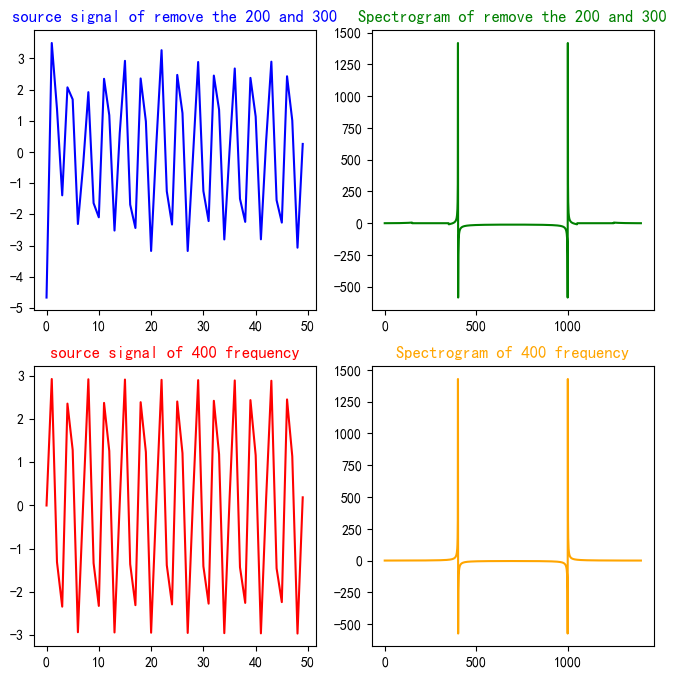

In [27]:
import scipy.fftpack as fftpack
# inverse fourier transformer
inverse_y = fftpack.ifft(fft_y)

# remove specify frequency of 200,300
fft_y_remove =  fft_y.copy()
def remove_specify_frequency(fft,frequency,N):
    fft[frequency] = 0
    reverse_index = [N-i for i in frequency]
    fft[reverse_index] = 0
    return fft
remove_specify_frequency(fft_y_remove,[i+200-50 for i in range(100)],N)
remove_specify_frequency(fft_y_remove,[i+300-50 for i in range(100)],N)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('source signal of remove the 200 and 300',color = 'blue')
fft_y_remove_inverse = fftpack.ifft(fft_y_remove)
plt.plot(x[:50],fft_y_remove_inverse.real[:50],'blue')

# Spectrogram means "频谱图"
plt.subplot(2,2,2)
plt.title('Spectrogram of remove the 200 and 300',color = 'green')
plt.plot(x,fft_y_remove,'green')

plt.subplot(2,2,3)
plt.title('source signal of 400 frequency',color = 'red')
y_400 = [3*np.sin(2*np.pi*400*i) for i in np.linspace(0,1,N)]
plt.plot(x[:50],y_400[:50],color='red')

plt.subplot(2,2,4)
plt.title('Spectrogram of 400 frequency',color = 'orange')
plt.plot(x,fft(y_400),'orange')
plt.show()
# print (type(f))

### Fourier transform in two dimensions discrete interpretation
$$
f(x,y)=\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}F(i,j)e^{-2\pi i(\frac{ix}{N}+\frac{jy}{N})}\\$$
$$
F(x,y)=\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}f(i,j)e^{-2\pi i(\frac{ix}{N}+\frac{jy}{N})}\\
$$
* Actually, if we wanna get the magnitude, we shall multuply the $\frac{1}{N^2}$ in front like below.
$$
F(x,y)=\frac{1}{N^2}\sum_{i=0}^{N-1}\sum_{j=0}^{N-1}f(i,j)e^{-2\pi i(\frac{ix}{N}+\frac{jy}{N})}\\
$$

**TIPS**:
* fftshift:用于将FFT变换之后的频谱显示范围从[0, N]变为：
* [-N/2, N/2-1](N为偶数)或者[-(N-1)/2, (N-1)/2](N为奇数) like below.
* we need fftshift cause we could make task more easily after fftshift deal with. 

<img src='./presentation/shift.png' width='450'>

* Refer to: https://baishui.blog.csdn.net/article/details/97369061
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
* https://blog.csdn.net/seekyong/article/details/104434128

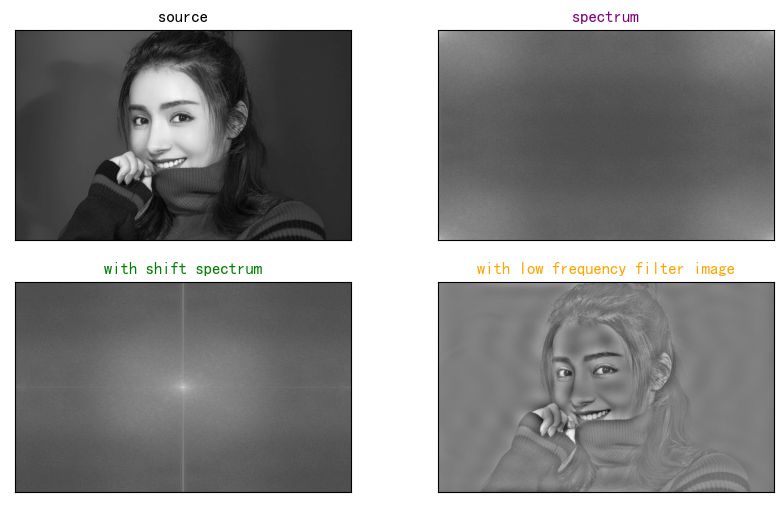

In [94]:
import cv2 as cv
img = cv.imread('./images/1.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_fft = fftpack.fftn(img)
img_fft_shift = fftpack.fftshift(img_fft)
# the real magnitude
img_magnitude = np.abs(img_fft/(img_fft.shape[0]*img_fft.shape[1]))

# for the covenience to show in plot image
img_magnitude = np.log(img_magnitude)*20
img_magnitude_shift = fftpack.fftshift(img_magnitude)

mid_w = int(img.shape[0]/2)
mid_h = int(img.shape[1]/2)
filter_range = 10
# filter the low frequency
img_fft_shift[mid_w-filter_range:mid_w+filter_range,mid_h-filter_range:mid_h+filter_range] = 0
img_ifft_low = fftpack.ifftn(fftpack.fftshift(img_fft_shift)).real
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.xticks([])
plt.yticks([])
plt.title('source')
plt.imshow(img,'gray')

plt.subplot(2,2,2)
plt.xticks([])
plt.yticks([])
plt.title('spectrum',color='purple')
plt.imshow(img_magnitude,'gray')

plt.subplot(2,2,3)
plt.xticks([])
plt.yticks([])
plt.imshow(img_magnitude_shift,'gray')
plt.title('with shift spectrum',color='green')

plt.subplot(2,2,4)
plt.xticks([])
plt.yticks([])
plt.imshow(img_ifft_low,'gray')
plt.title('with low frequency filter image',color='orange')
plt.show()